<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Decision%20Tree/DecisionTreeClassifier_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount( '/content/drive' )

Mounted at /content/drive


In [29]:
import pandas as pd
from   sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [7]:
url = 'https://raw.githubusercontent.com/MaxVieiraSantiago/Machine-Learning-Algorithms/master/Dataset/diabetes.csv'
df_diabetes = pd.read_csv( url )
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:

X = df_diabetes.drop( 'Outcome', axis=1 )
y = df_diabetes['Outcome']

X_treino, X_teste, y_treino, y_teste = train_test_split( X, y, test_size=0.33, random_state=1 )

In [10]:
X_treino.shape, X_teste.shape

((514, 8), (254, 8))

In [41]:
modelo = DecisionTreeClassifier(max_depth=2)

# **Hiperparâmetros da Árvore**

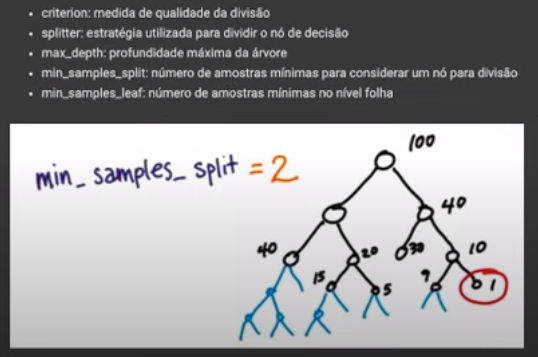

In [42]:
modelo.fit( X_treino, y_treino )

DecisionTreeClassifier(max_depth=2)

## **Verificando as Features mais Importantes para o modelo treinado**

In [43]:
modelo.feature_importances_

array([0.        , 0.62839484, 0.        , 0.        , 0.        ,
       0.21046761, 0.        , 0.16113755])

In [44]:
for feature, importancia in zip ( df_diabetes.columns, modelo.feature_importances_):
  print(f'{feature} : {importancia * 100:,.2f}%' )

Pregnancies : 0.00%
Glucose : 62.84%
BloodPressure : 0.00%
SkinThickness : 0.00%
Insulin : 0.00%
BMI : 21.05%
DiabetesPedigreeFunction : 0.00%
Age : 16.11%


In [45]:
y_pred = modelo.predict( X_teste )
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [46]:
print( metrics.confusion_matrix( y_teste, y_pred ) )

[[145  17]
 [ 37  55]]


In [47]:
print( metrics.classification_report( y_teste, y_pred ) )

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       162
           1       0.76      0.60      0.67        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254



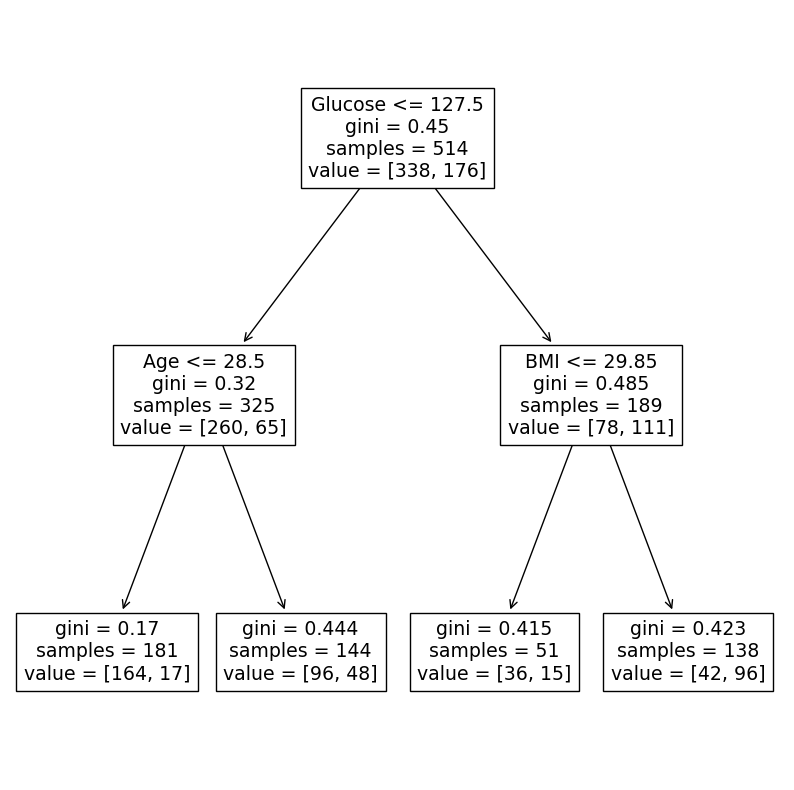

In [48]:
plt.figure( figsize=(10,10))

plot_tree( modelo, feature_names=df_diabetes.columns )

plt.show()